#### Importo le librerie utili

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

##### Carico il dataset

In [3]:
dataset= pd.read_csv("D://Desktop/classification_dataset.csv",sep="	")

In [39]:
dataset['OUTPUT'].unique()

array(['B&B', 'Case_Appartamenti', '4_a_5_Stelle', '1_a_3_Stelle',
       'Campeggio'], dtype=object)

In [129]:
for el in dataset.columns:
    print(el,": ", dataset[el].dtypes)

ID :  int64
PROVINCIA :  object
COMUNE :  object
LOCALITA :  object
CAMERE :  int64
SUITE :  int64
LETTI :  int64
BAGNI :  int64
PRIMA_COLAZIONE :  float64
IN_ABITATO :  float64
SUL_LAGO :  float64
VICINO_ELIPORTO :  float64
VICINO_AEREOPORTO :  float64
ZONA_CENTRALE :  float64
VICINO_IMP_RISALITA :  float64
ZONA_PERIFERICA :  float64
ZONA_STAZIONE_FS :  float64
ATTREZZATURE_VARIE :  object
CARTE_ACCETTATE :  object
LINGUE_PARLATE :  object
SPORT :  object
CONGRESSI :  object
LATITUDINE :  float64
LONGITUDINE :  float64
OUTPUT :  object


###### sostituisco i valori nulli nel database con lo 0, per non avere problemi durante la creazione del modello. Trasformo la colonna PRIMA_COLAZIONE in float.

In [95]:
dataset.fillna(0,inplace=True)

In [128]:
dataset['PRIMA_COLAZIONE']=dataset['PRIMA_COLAZIONE'].astype(float,inplace=True)

##### Divido il dataset in train e test

In [130]:
train, test = train_test_split(dataset, test_size=0.2)

In [131]:
train['OUTPUT'].unique()

array(['1_a_3_Stelle', 'Case_Appartamenti', 'Campeggio', 'B&B',
       '4_a_5_Stelle'], dtype=object)

In [132]:
test['OUTPUT'].unique()

array(['Case_Appartamenti', 'B&B', '4_a_5_Stelle', '1_a_3_Stelle',
       'Campeggio'], dtype=object)

#### Creo il train_x che contiene le features che risultano utili per la creazione del modello e imposto train_y con i valori dell'output in cui il modello deve allenarsi.

In [284]:
train_x= train.iloc[:,4:16].values
train_y= train.iloc[:,24:].values

###### Creo il test_y che contiene tutte le features del train_x su cui si baserà la previsione tramite il modello creto. Tengo i valori dell'output per poi calcolare l'accuracy dunque la bontà della previsione

In [285]:
test_x= test.iloc[:,4:16].values
test_y= test.iloc[:,24:].values

##### Tramite LabelEncoder trasformo l'output che sono in formato testo in numeri comprei da 0 a 4.

In [286]:
le = preprocessing.LabelEncoder()
le.fit(train_y)

D:\Programmi\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [287]:
train_y=le.transform(train_y)

D:\Programmi\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [288]:
test_y=le.transform(test_y)

D:\Programmi\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gaussian Naive Bayes model

Text(0.5, 14.09375, 'Predicted label')

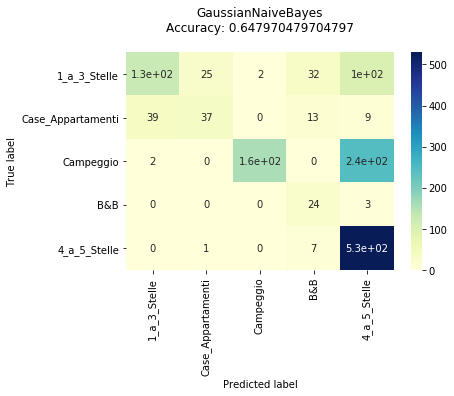

In [289]:
gnb = GaussianNB().fit(train_x, train_y) 
gnb_predictions = gnb.predict(test_x) 

accuracy = gnb.score(test_x, test_y) 
 
confusionMatrix = confusion_matrix(test_y, gnb_predictions,labels=[0,1,2,3,4])

cm_plot = pd.DataFrame(confusionMatrix,
                     index =['1_a_3_Stelle', 'Case_Appartamenti', 'Campeggio', 'B&B', '4_a_5_Stelle'] ,
           columns =['1_a_3_Stelle', 'Case_Appartamenti', 'Campeggio', 'B&B','4_a_5_Stelle'])
sn.heatmap(cm_plot,annot=True,cmap="YlGnBu")
plt.title('GaussianNaiveBayes\nAccuracy: ' + str(accuracy)+"\n")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## K-NeighborsClassifier model

Text(0.5, 14.09375, 'Predicted label')

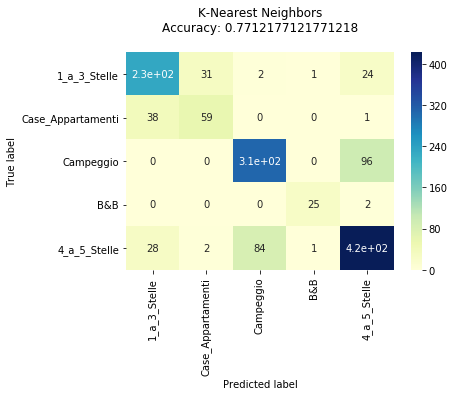

In [291]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(train_x, train_y) 
  
# accuracy on X_test 
accuracy2 = knn.score(test_x, test_y) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(test_x)  
confusionMatrixknn = confusion_matrix(test_y, knn_predictions,labels=[0,1,2,3,4]) 

cm_plot_knn = pd.DataFrame(confusionMatrixknn,
                     index =['1_a_3_Stelle', 'Case_Appartamenti', 'Campeggio', 'B&B', '4_a_5_Stelle'] ,
           columns =['1_a_3_Stelle', 'Case_Appartamenti', 'Campeggio', 'B&B','4_a_5_Stelle'])
sn.heatmap(cm_plot_knn,annot=True,cmap="YlGnBu")
plt.title('K-Nearest Neighbors\nAccuracy: ' + str(accuracy2)+"\n")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Tra i due modelli costruiti quello con accuracy più alta risulta essere il K-NeighborsClassifier, con un'accuracy del 77%. Alcuni miglioramenti potrebbero essere apportato utilizzando le features che contengono porzioni di testo, o tramite text mining, o banalmente utilizzando la logica binaria 0 e 1, indicando con 0 le strutture che hanno valori nulli e con 1 le strutture che hanno ad esempio attività sportive, accettano pagamenti con carta o parlano più lingue. 

#### Un piccolo tool per visualizzare un pò il dataset.

In [317]:
%%HTML

<div class='tableauPlaceholder' id='viz1581006724016' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Test_iscs&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Test_iscs&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Test_iscs&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1581006724016');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>